## Init

In [213]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries used 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

In [214]:
df = pd.read_csv('/home/yanis/Téléchargements/projet e commerce/Code/bank-additional-full.csv', sep = ';') 
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [215]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Suite à l'analyse de corrélation, suppression des colonnes qui ont un taux de corrélation supérieure à 0.95

In [217]:
# Removing columns with high correlation ( More than 0.95)
variables_to_remove = ['euribor3m', 'nr.employed','emp.var.rate']  
#drop
df_filtered = df.drop(variables_to_remove, axis=1)


In [218]:
# Numerical Columns
numerical_columns2 = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'cons.price.idx', 'cons.conf.idx'
                     ]

# Compute the correlation matrix
correlation_matrix = df_filtered[numerical_columns2].corr()

"""plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()"""

'plt.figure(figsize=(8, 6))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f", square=True)\nplt.title(\'Correlation Matrix of Numerical Variables\')\nplt.show()'

In [219]:
# Keeping the column I think is relevant to the model 

variables_to_remove2 = ['contact', 'month','day_of_week','poutcome']  
#drop
df_filtered = df_filtered.drop(variables_to_remove2, axis=1)
df_filtered.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')

In [220]:
df_filtered['marital'].value_counts(dropna=False)

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [221]:
df_filtered['housing'].value_counts(dropna=False)

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [222]:
df_filtered['education'].value_counts(dropna=False)

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [193]:
# Suppression des lignes où 'y' a des valeurs NaN
df_filtered = df_filtered.dropna(subset=['y'])
df_filtered = df_filtered[df_filtered['marital'] != 'unknown']
df_filtered = df_filtered[df_filtered['housing'] != 'unknown']
df_filtered['education'] = df_filtered['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic.education')

In [194]:
num_bins = 5
# Create equal-width bins for ages
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=num_bins, labels=[f'Group {i+1}' for i in range(num_bins)])

df_filtered['age_group'].value_counts()

age_group
Group 2    19635
Group 1    12649
Group 3     7230
Group 4      508
Group 5       97
Name: count, dtype: int64

In [195]:
# removing age from df 
df_filtered = df_filtered.drop(columns=['age'])
df_filtered.head(1)

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
0,housemaid,married,basic.education,no,no,no,261,1,999,0,93.994,-36.4,no,Group 3


In [196]:
cat_columns_y= ['y']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for column in cat_columns_y:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])

df_filtered.head(1)

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
0,housemaid,married,basic.education,no,no,no,261,1,999,0,93.994,-36.4,0,Group 3


In [197]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing','loan', 'age_group']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit and transform the categorical columns
df_filtered_encoded = one_hot_encoder.fit_transform(df_filtered[cat_columns])

# Convert the output to a dataframe
df_filtered_encoded = pd.DataFrame(df_filtered_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(cat_columns))

# Concatenate with the rest of the data (if there are any non-categorical columns)
non_cat_columns = df_filtered.drop(columns=cat_columns).columns
df_final = pd.concat([df_filtered[non_cat_columns], df_filtered_encoded], axis=1)

df_final.head(1)


,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.education,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5
0,261.0,1.0,999.0,0.0,93.994,-36.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [198]:
df_final = df_final.dropna(subset=['y'])

In [199]:
df_final = df_final.dropna(subset=['job_admin.'])

In [200]:
unknown_rows_filtered = df_filtered.apply(lambda x: x == 'unknown').any(axis=1)
df_with_unknown = df_filtered[unknown_rows_filtered]

In [201]:
df_with_unknown.head(1)

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
1,services,married,high.school,unknown,no,no,149,1,999,0,93.994,-36.4,0,Group 3


In [202]:
len(df_with_unknown)

9631

In [203]:
num_columns = ['duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx']

# Initialize StandardScaler
scaler = StandardScaler()

df_final[num_columns] = scaler.fit_transform(df_final[num_columns])
df_final.head(1)

,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.education,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5
0,0.015018,-0.568151,0.170017,-0.343551,0.768436,0.883977,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [204]:
# Réinitialiser les index
X = df_final.drop(columns=['y']).reset_index(drop=True)  # Features
y = df_final['y'].reset_index(drop=True)  # Target variable

# Division des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles d'entraînement et de test
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (31266, 39) (31266,)
Testing set shape: (7817, 39) (7817,)


In [205]:
# Vérification de l'absence de valeurs NaN dans les nouveaux ensembles
print("NaN dans y_train_clean:", y_train.isnull().sum())
print("NaN dans y_test_clean:", y_test.isnull().sum())

NaN dans y_train_clean: 0
NaN dans y_test_clean: 0


## Regression logistique

Accuracy: 0.9126263272355123


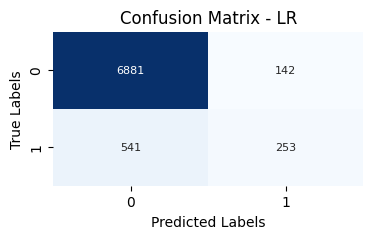

In [206]:
from sklearn.linear_model import LogisticRegression # Library

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train) # Train the model on the training set

y_pred_lr = model.predict(X_test) # Make predictions on the testing set

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - LR')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [207]:
import pickle

# Enregistrez le modèle dans un fichier .pickle après l'avoir entraîné
with open('/home/yanis/Téléchargements/projet bank classification/logistic_regression.pickle', 'wb') as file:
    pickle.dump(model, file)


In [208]:
X_train.columns.tolist()# Affiche la liste des colonnes utilisées pour l'entraînement


['duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.education',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'age_group_Group 1',
 'age_group_Group 2',
 'age_group_Group 3',
 'age_group_Group 4',
 'age_group_Group 5']

In [209]:
data_example = {
    'duration': [200], 
    'campaign': [2], 
    'pdays': [999], 
    'previous': [0], 
    'cons.price.idx': [93.994], 
    'cons.conf.idx': [-36.4], 
    # Encodage One-Hot pour 'job'
    'job_admin.': [1], 
    'job_blue-collar': [0], 
    'job_entrepreneur': [0], 
    'job_housemaid': [0], 
    'job_management': [0], 
    'job_retired': [0], 
    'job_self-employed': [0], 
    'job_services': [0], 
    'job_student': [0], 
    'job_technician': [0], 
    'job_unemployed': [0], 
    'job_unknown': [0], 
    # Encodage One-Hot pour 'marital'
    'marital_divorced': [0], 
    'marital_married': [1], 
    'marital_single': [0], 
    # Encodage One-Hot pour 'education'
    'education_basic.education': [1], 
    'education_high.school': [0], 
    'education_illiterate': [0], 
    'education_professional.course': [0], 
    'education_university.degree': [0], 
    'education_unknown': [0], 
    # Encodage One-Hot pour 'default'
    'default_no': [1], 
    'default_unknown': [0], 
    'default_yes': [0], 
    # Encodage One-Hot pour 'housing'
    'housing_no': [0], 
    'housing_yes': [1], 
    # Encodage One-Hot pour 'loan'
    'loan_no': [1], 
    'loan_yes': [0], 
    # Encodage One-Hot pour 'age_group'
    'age_group_Group 1': [0], 
    'age_group_Group 2': [1], 
    'age_group_Group 3': [0], 
    'age_group_Group 4': [0], 
    'age_group_Group 5': [0]
}

# Convertir le dictionnaire en DataFrame
df_example = pd.DataFrame(data_example)


In [210]:
# Faire une prédiction avec l'exemple d'entrée
prediction = model.predict(df_example)

# Afficher le résultat de la prédiction
print("Résultat de la prédiction :", prediction)

Résultat de la prédiction : [0.]


In [211]:
df["pdays"].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64